In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import os
import sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

Read the fits event file

In [2]:
hdul = fits.open("scorefile.fits")
hdul.info()

events = hdul[1].data
print(events.columns)

t_ID = events['EventID']
t_ED = events['En_dep']
t_SI = events['Scint_ID']
t_XP = events['X_Primary']
t_YP = events['Y_Primary']
t_ZP = events['Z_Primary']
t_TP = events['Theta_Primary']
t_PP = events['Phi_Primary']
t_EP = events['En_Primary']
t_Dx = events['X_Detected']
t_Dy = events['Y_Detected']
t_Dz = events['Z_Detected']

Filename: scorefile.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     43   47861R x 12C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
ColDefs(
    name = 'EventID'; format = '1K'
    name = 'En_dep'; format = '1D'; unit = 'keV'
    name = 'Scint_ID'; format = '1K'
    name = 'X_Primary'; format = '1D'; unit = 'cm'
    name = 'Y_Primary'; format = '1D'; unit = 'cm'
    name = 'Z_Primary'; format = '1D'; unit = 'cm'
    name = 'Theta_Primary'; format = '1D'; unit = 'degree'
    name = 'Phi_Primary'; format = '1D'; unit = 'degree'
    name = 'En_Primary'; format = '1D'; unit = 'keV'
    name = 'X_Detected'; format = '1D'; unit = 'cm'
    name = 'Y_Detected'; format = '1D'; unit = 'cm'
    name = 'Z_Detected'; format = '1D'; unit = 'cm'
)


Print some value

In [3]:
print('Nr of records: {}'.format(len(t_ID)))
print(f'The first 100 scintitor IDs: {t_SI[0:99]}')

Nr of records: 47861
The first 100 scintitor IDs: [113 114 113 119 116 131 131 124 109 113 128 118  54 124  36  38 110 121
  58 132 102 122 125 126 110 116  24 105 131   7 115  27 107 114 132 102
 121 101 103 119 132 114 122 131  51 101 109 130 118 130  24 123 132 108
 130 125 130 102 127 117 111 121 113 122 125  39  34 108 129 123 115 111
  56  16 113  14 129 120 107   2 121 131 105  46 107 128  59 105 126  55
  17 116 127 131  51  61 125 130 128]


Create a pandas data frame

In [4]:
data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)
df

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,0,11.383900,113,-4.956077,0.942009,-8.0,180.0,0.0,60.0,-52.989151,7.291008,-32.883976
1,1,57.558876,114,0.090495,-0.125202,-8.0,180.0,0.0,60.0,-52.989151,-0.008992,-32.883976
2,3,59.927824,113,-5.300817,0.537832,-8.0,180.0,0.0,60.0,-52.989151,7.291008,-32.883976
3,6,57.711798,119,-3.894818,3.740204,-8.0,180.0,0.0,60.0,-38.239151,33.041008,-32.883976
4,8,59.869903,116,-4.157121,-0.110387,-8.0,180.0,0.0,60.0,-52.989151,-14.608992,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
47856,119984,60.000000,106,0.953757,-0.283810,-8.0,180.0,0.0,60.0,9.410848,-3.608992,-32.883976
47857,119987,49.860972,127,-4.833255,-0.605360,-8.0,180.0,0.0,60.0,-41.839153,-29.358992,-32.883976
47858,119995,39.238040,112,-0.268417,-0.066900,-8.0,180.0,0.0,60.0,-52.989151,14.591008,-32.883976
47859,119995,4.257019,15,-0.268417,-0.066900,-8.0,180.0,0.0,60.0,-1.914152,-9.383992,-32.883976


### Select the Scattterer (Scint_ID < 100) elements

In [5]:
df[df['Scint_ID'] < 100]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
12,33,0.235579,54,-3.177964,2.015241,-8.0,180.0,0.0,60.0,-33.014153,21.666007,-32.883976
14,36,59.663309,36,-1.298169,2.467357,-8.0,180.0,0.0,60.0,-6.214152,21.666007,-32.883976
15,36,0.284011,38,-1.298169,2.467357,-8.0,180.0,0.0,60.0,-14.914153,17.316008,-32.883976
18,49,9.775527,58,-3.643671,2.117510,-8.0,180.0,0.0,60.0,-37.364151,21.666007,-32.883976
26,70,59.982040,24,-3.354209,-1.035760,-8.0,180.0,0.0,60.0,-32.964151,-9.383992,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
47846,119956,2.016812,44,-0.622345,1.133569,-8.0,180.0,0.0,60.0,-6.214152,12.966008,-32.883976
47847,119962,10.487380,24,-3.446148,-1.090873,-8.0,180.0,0.0,60.0,-32.964151,-9.383992,-32.883976
47848,119963,0.138369,22,-4.099136,-0.820104,-8.0,180.0,0.0,60.0,-41.664152,-9.383992,-32.883976
47859,119995,4.257019,15,-0.268417,-0.066900,-8.0,180.0,0.0,60.0,-1.914152,-9.383992,-32.883976


Print the number of hits for each scaterer

In [6]:
for scatterer_ID in range(64):
   print(len(df[df['Scint_ID'] == scatterer_ID+1]))

174
227
176
180
171
148
177
192
180
166
187
196
184
188
180
178
172
172
203
198
214
197
189
183
206
163
180
192
175
178
170
178
171
205
159
179
185
157
206
177
166
175
187
173
189
181
184
190
196
180
197
185
181
180
177
188
175
173
188
210
193
165
166
166


In [7]:
# The first ID
df[df['Scint_ID'] == 1]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
411,1013,3.460865,1,-2.228015,2.181710,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
994,2411,0.120454,1,-1.527203,-1.409733,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
1007,2435,1.910184,1,-0.249219,-1.821844,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
1165,2818,0.131307,1,-0.311134,-1.956801,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
1214,2937,0.273050,1,-0.255401,-1.767872,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
46183,115727,0.154789,1,-0.063228,-1.955743,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
46195,115743,0.366398,1,-0.706702,-2.441911,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
47305,118589,0.273040,1,-0.103858,-1.791053,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976
47779,119762,9.612344,1,-0.283977,-1.718796,-8.0,180.0,0.0,60.0,-1.914152,-18.083993,-32.883976


In [8]:
df[df['Scint_ID'] == 1].iloc[0,:]

EventID          1013.000000
En_dep              3.460865
Scint_ID            1.000000
X_Primary          -2.228015
Y_Primary           2.181710
Z_Primary          -8.000000
Theta_Primary     180.000000
Phi_Primary         0.000000
En_Primary         60.000000
X_Detected         -1.914152
Y_Detected        -18.083993
Z_Detected        -32.883976
Name: 411, dtype: float64

Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [9]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(64):
    Scint_ID.append(int(df[df['Scint_ID'] == i+1].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table_scatterer = pd.DataFrame(data)
look_up_table_scatterer

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,1,-1.914152,-18.083993,-32.883976
1,2,-14.964152,-5.033992,-32.883976
2,3,-14.964152,-9.383992,-32.883976
3,4,-14.964152,-13.733992,-32.883976
4,5,-14.964152,-18.083993,-32.883976
...,...,...,...,...
59,60,-37.364151,12.966008,-32.883976
60,61,-37.364151,8.616008,-32.883976
61,62,-41.714151,21.666007,-32.883976
62,63,-41.714151,17.316008,-32.883976


### Select the absorber (Scint_ID > 100) elements

In [10]:
df[df['Scint_ID'] > 100]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,0,11.383900,113,-4.956077,0.942009,-8.0,180.0,0.0,60.0,-52.989151,7.291008,-32.883976
1,1,57.558876,114,0.090495,-0.125202,-8.0,180.0,0.0,60.0,-52.989151,-0.008992,-32.883976
2,3,59.927824,113,-5.300817,0.537832,-8.0,180.0,0.0,60.0,-52.989151,7.291008,-32.883976
3,6,57.711798,119,-3.894818,3.740204,-8.0,180.0,0.0,60.0,-38.239151,33.041008,-32.883976
4,8,59.869903,116,-4.157121,-0.110387,-8.0,180.0,0.0,60.0,-52.989151,-14.608992,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
47854,119978,16.919694,102,0.949980,2.805543,-8.0,180.0,0.0,60.0,9.410848,25.591007,-32.883976
47855,119982,59.938550,132,-0.680729,-3.091986,-8.0,180.0,0.0,60.0,-5.339152,-29.358992,-32.883976
47856,119984,60.000000,106,0.953757,-0.283810,-8.0,180.0,0.0,60.0,9.410848,-3.608992,-32.883976
47857,119987,49.860972,127,-4.833255,-0.605360,-8.0,180.0,0.0,60.0,-41.839153,-29.358992,-32.883976


Print the number of hits for each absorber

In [11]:
for scatterer_ID in range(32):
   print(len(df[df['Scint_ID'] == scatterer_ID+101]))

964
1029
1037
1099
1057
1086
1078
1039
1098
1026
1028
1067
1034
1073
1064
1059
1018
1194
1177
1244
1254
1307
1256
1184
1155
1091
1180
1230
1246
1293
1234
1282


In [12]:
# The first ID
df[df['Scint_ID'] == 101]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
37,103,59.985880,101,1.033135,-2.675130,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
45,132,51.348659,101,0.235025,0.050262,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
178,435,53.223823,101,-0.852426,-0.330021,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
252,630,59.963673,101,1.164600,-2.609697,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
290,744,59.967110,101,1.124157,-2.679798,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
47747,119660,59.936359,101,0.777338,-2.209276,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
47798,119807,54.727221,101,-2.060367,1.625712,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
47802,119817,59.855378,101,0.903203,-2.205571,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976
47822,119871,59.933380,101,0.711617,-2.252897,-8.0,180.0,0.0,60.0,9.410848,-25.508993,-32.883976


In [13]:
df[df['Scint_ID'] == 101].iloc[0,:]

EventID          103.000000
En_dep            59.985880
Scint_ID         101.000000
X_Primary          1.033135
Y_Primary         -2.675130
Z_Primary         -8.000000
Theta_Primary    180.000000
Phi_Primary        0.000000
En_Primary        60.000000
X_Detected         9.410848
Y_Detected       -25.508993
Z_Detected       -32.883976
Name: 37, dtype: float64

Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [14]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(32):
    Scint_ID.append(int(df[df['Scint_ID'] == i+101].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table_absorber = pd.DataFrame(data)

Text(0, 0.5, 'y (mm)')

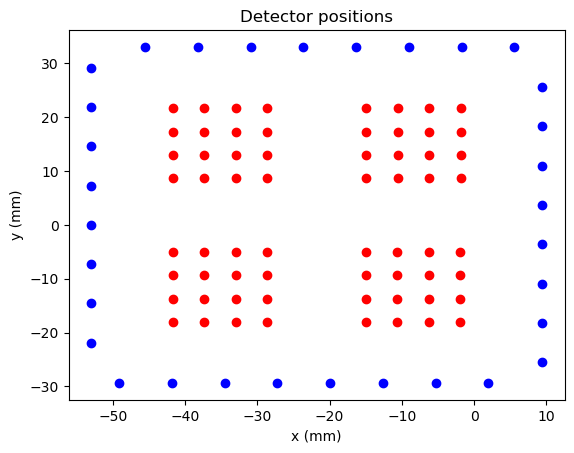

In [18]:
position_x = []
position_y = []
position_z = []
for i in range(len(look_up_table_scatterer)):
    position_x.append(look_up_table_scatterer.iloc[i,1])
    position_y.append(look_up_table_scatterer.iloc[i,2])
    position_z.append(look_up_table_scatterer.iloc[i,3])
plt.plot(position_x, position_y, 'o', color='red');

position_x = []
position_y = []
position_z = []
for i in range(len(look_up_table_absorber)):
    position_x.append(look_up_table_absorber.iloc[i,1])
    position_y.append(look_up_table_absorber.iloc[i,2])
    position_z.append(look_up_table_scatterer.iloc[i,3])
plt.plot(position_x, position_y, 'o', color='blue');
    
plt.title('Detector positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    

### Plot the z positions

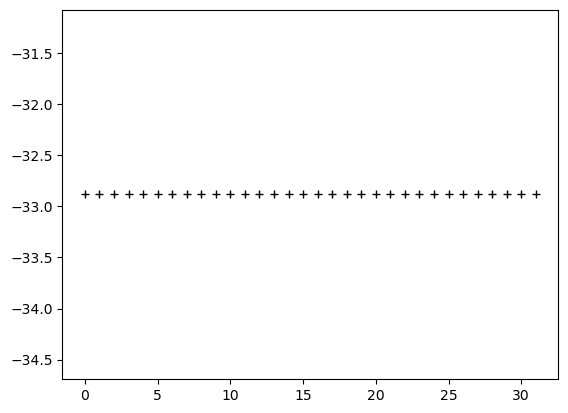

In [20]:
plt.plot(position_z, '+', color='black');

### The energy distribution

In [16]:
# Group by ''EventID' column 
grouped = df.groupby('EventID')

# Perform aggregation
sum_by_category = grouped['En_dep'].sum()

sum_by_category

EventID
0         11.383900
1         57.558876
3         59.927824
6         57.711798
8         59.869903
            ...    
119978    16.919694
119982    59.938550
119984    60.000000
119987    49.860972
119995    43.781892
Name: En_dep, Length: 39388, dtype: float64

Plot the spectrum

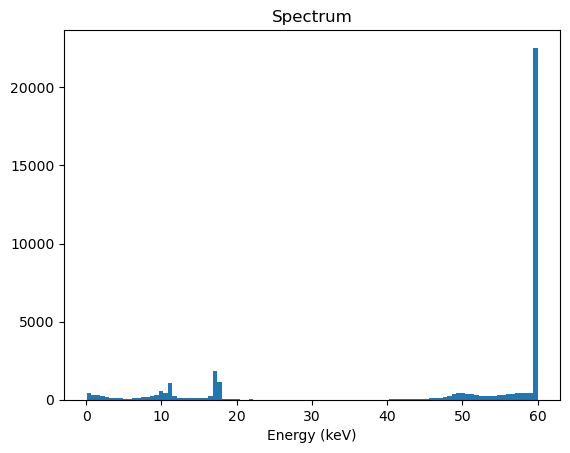

In [17]:
plt.hist(sum_by_category, bins=100);
plt.title('Spectrum');
plt.xlabel('Energy (keV)');